<a href="https://colab.research.google.com/github/sidpatondikar/GRIP-APRIL-2023-Task-2/blob/main/Task_2_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation GRIP APRIL 2023



## Data Science & Business Analytics Internship 

## Task 2 - Prediction using Unupervised ML



### Author : Siddharth Patondikar

###Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 


Dataset : https://bit.ly/3kXTdox

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset
iris_df = pd.read_csv('Iris.csv')
iris_df.drop('Id',axis=1,inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

In [13]:
iris_df.shape

(150, 5)

In [3]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Plotting Scatterplots

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

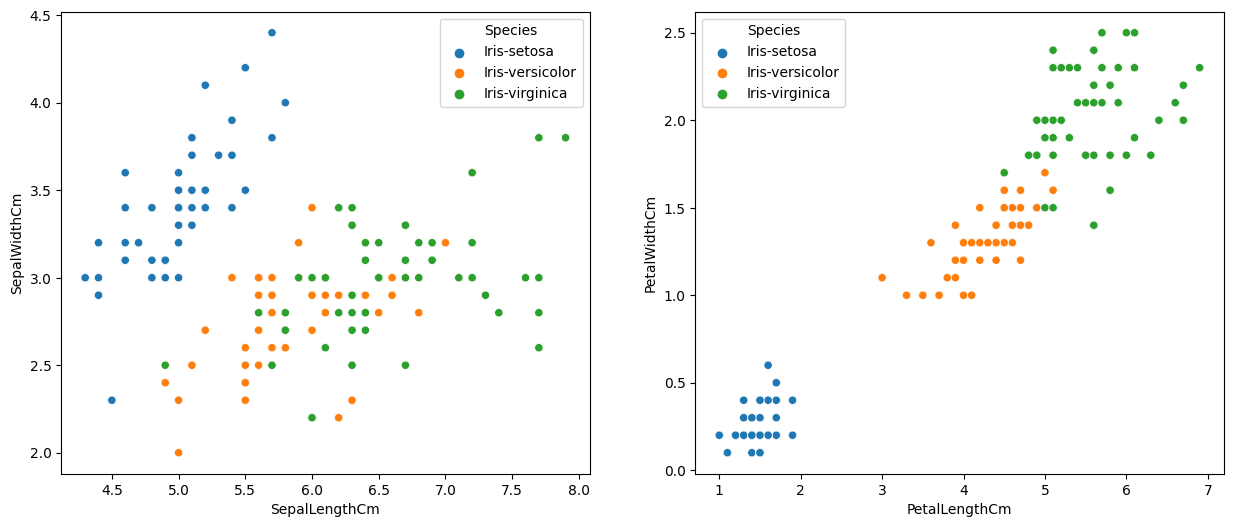

In [9]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(iris_df, x='SepalLengthCm',y='SepalWidthCm',hue='Species')

plt.subplot(1,2,2)
sns.scatterplot(iris_df, x='PetalLengthCm',y='PetalWidthCm',hue='Species')

###Using the Within-Cluster-Sum-of-Squares (WCSS) formula: In the below formula K=3

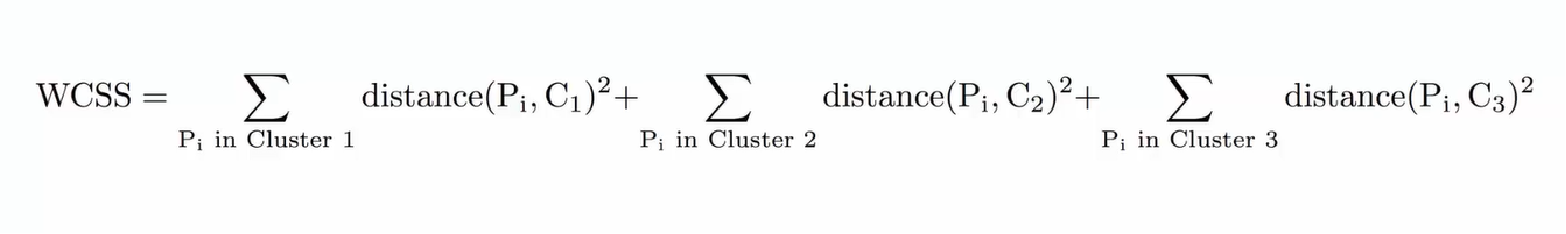

###As we keep increasing the clusters, WCSS will keep on decreasing, up to the point where the number of clusters are same as the number of points in the dataset. In that case WCSS is 0 and minimum.

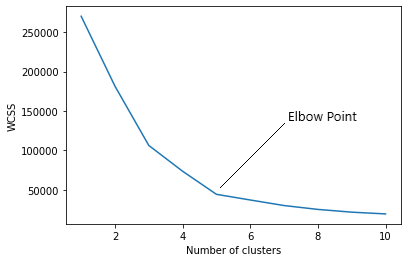


###We can draw a graph for WCSS values as we increase the number of clusters and follow the elbow method to see where the graph changes significantly and select that K value.

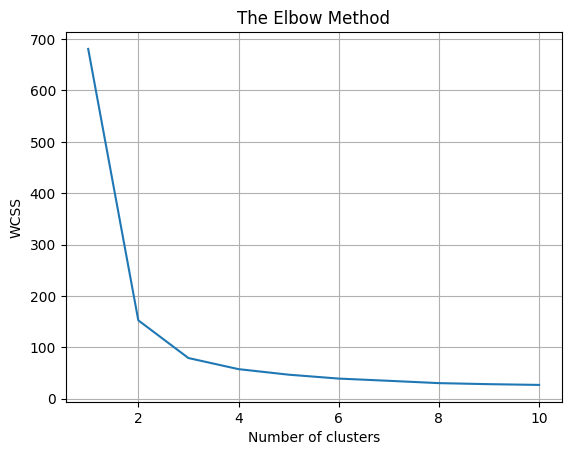

In [10]:
#Calculating optimum number of clusters

#Taking first 4 columns from dataset
X = iris_df.iloc[:,0:4].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init=10, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

#Plotting Elbow Method Graph

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

From the above chart, we can see the elbow point is at n=3. Hence, n=3 is the ideal amount of clusters.

In [11]:
#Applying K-Means to dataset, creating a K-Means classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

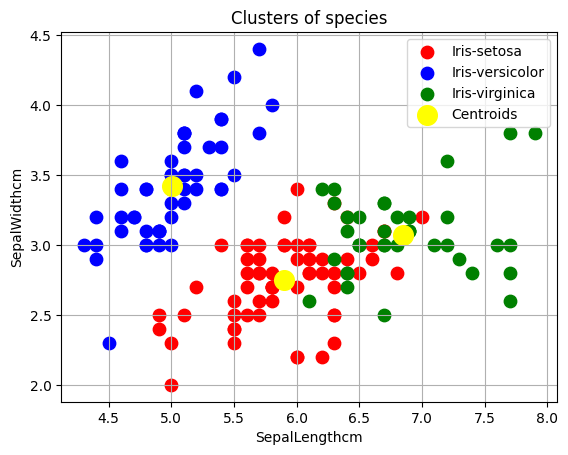

In [12]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')


plt.title('Clusters of species')
plt.xlabel('SepalLengthcm')
plt.ylabel('SepalWidthcm')
plt.legend()
plt.grid()
plt.show()

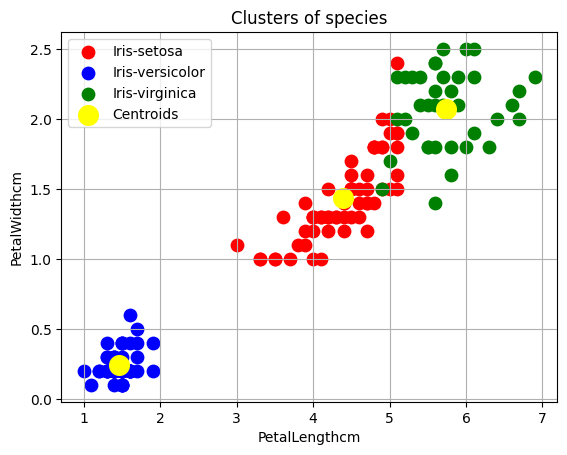

In [14]:
# Visualising the clusters - On the 3rd and 4th columns
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 80, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 80, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 80, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 200, c = 'yellow', label = 'Centroids')

plt.title('Clusters of species')
plt.xlabel('PetalLengthcm')
plt.ylabel('PetalWidthcm')
plt.legend()
plt.grid()
plt.show()